In [1]:
from IPython.display import clear_output

In [4]:
!pip install cdlib
!pip install ndlib
clear_output()

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle
from collections import Counter
import math

import cdlib
from cdlib import algorithms, evaluation, viz, ensemble

Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'infomap', 'bayanpy', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'leidenalg', 'infomap'}


In [6]:
#we define two functions to perform communitiy algorithm quantitative analysis

def method_insight(method):

  return {'method_params' : method.method_parameters,
   'overlap' : method.overlap,
   'newman_girvan_modularity' : method.newman_girvan_modularity(),
   'node_coverage' : method.node_coverage,
   'node_numbers' : method.size(),
   'method_conductance' : method.conductance(),
   'link_modularity' : method.link_modularity(),
   'avg_internal_degree' : method.average_internal_degree(),
   'internal_edge_density' : method.internal_edge_density(),
   'cut_ratio' : method.cut_ratio(),

  }


def communities_insight(method):
    communities = method.communities
    nodes = set(sum(communities, []))
    return {'total_communities' : len(communities),
     'total_nodes' : len(nodes)
     }

In [7]:
def plot_boxplot(list_communities):
    labels, data = [], []

    for i in range(len(list_communities)):
        labels.append(list_communities[i][0])
        data.append(list_communities[i][1])

    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    plt.boxplot(data, labels=labels)

    plt.grid(axis='both', alpha=.2)
    plt.title("Size box-plot")


    plt.xlabel("Algorithms")
    plt.ylabel("Size")
    plt.yscale("log")

    plt.show()

In [8]:
with open("C:/Users/acast/Desktop/Progetto sna/data collection/grafo_finale.pickle", 'rb') as f:
    G = pickle.load(f)

In [10]:
artist = "Taylor Swift"

# trova il primo nodo con nome uguale (case insensitive)
node_id = next(
    (n for n, d in G.nodes(data=True) if d.get("artist_name","").lower() == artist.lower()),
    None
)

if node_id:
    print("ID Spotify:", node_id)
    print("Attributi:", G.nodes[node_id])
else:
    print(f"{artist} non trovato nel grafo")


ID Spotify: 06HL4z0CvFAxyc27GXpf02
Attributi: {'artist_name': 'Taylor Swift', 'artist_id': '06HL4z0CvFAxyc27GXpf02', 'artist_popularity': 99, 'artist_first_genre': 'genre_not_available', 'artist_n_followers': 141679891}


In [11]:
k_cliques = ensemble.Parameter(name="k", start=2, end=10, step=1)

In [12]:
k_clique_communities, k_cliques_score = ensemble.random_search(graph=G, method=algorithms.kclique,
                                              parameters=[k_cliques],
                                              quality_score=evaluation.newman_girvan_modularity,
                                              aggregate=max, instances = 3)

In [13]:
method_insight(k_clique_communities)

{'method_params': {'k': 3},
 'overlap': True,
 'newman_girvan_modularity': FitnessResult(min=None, max=None, score=0.026803457358188086, std=None),
 'node_coverage': 0.06631778399350356,
 'node_numbers': FitnessResult(min=3, max=138, score=7.980952380952381, std=16.80134969203138),
 'method_conductance': FitnessResult(min=0.453030303030303, max=0.9627329192546584, score=0.7951856260079833, std=0.11451243701317605),
 'link_modularity': FitnessResult(min=None, max=None, score=0.015393396464919265, std=None),
 'avg_internal_degree': FitnessResult(min=2.0, max=7.22, score=2.633638020711228, std=0.9637322763019418),
 'internal_edge_density': FitnessResult(min=0.052575901830106846, max=1.0, score=0.7885071910221286, std=0.2780292392352119),
 'cut_ratio': FitnessResult(min=0.00021058965102286402, max=0.004663056558363418, score=0.001215921442173139, std=0.0007851856009063285)}

In [14]:
communities_insight(k_clique_communities)

{'total_communities': 105, 'total_nodes': 735}

In [15]:
with open("k_clique_communities.pickle", 'wb') as f:
    pickle.dump(k_clique_communities, f)

### Label Propagation

In [16]:
label_commmunities = algorithms.label_propagation(G)

In [17]:
method_insight(label_commmunities)

{'method_params': {'': ''},
 'overlap': False,
 'newman_girvan_modularity': FitnessResult(min=None, max=None, score=0.7199384526322689, std=None),
 'node_coverage': 1.0,
 'node_numbers': FitnessResult(min=1, max=548, score=8.41533788914199, std=18.917753694354754),
 'method_conductance': FitnessResult(min=0.0, max=0.7777777777777778, score=0.17577590526531184, std=0.1897004913151424),
 'link_modularity': FitnessResult(min=None, max=None, score=0.10607194011594764, std=None),
 'avg_internal_degree': FitnessResult(min=0.0, max=3.8649635036496353, score=1.2131479238189167, std=0.730216278911071),
 'internal_edge_density': FitnessResult(min=0, max=1.0, score=0.33939956028958573, std=0.3363049451336237),
 'cut_ratio': FitnessResult(min=0.0, max=0.0003910950661853189, score=4.267776559249415e-05, std=5.584397620235273e-05)}

In [18]:
communities_insight(label_commmunities)

{'total_communities': 1317, 'total_nodes': 11083}

In [19]:
with open("label_commmunities.pickle", 'wb') as f:
    pickle.dump(label_commmunities, f)

### Demon

In [20]:
eps = ensemble.Parameter(name="epsilon", start=0.1, end=0.9, step=0.1)
size = ensemble.Parameter(name="min_com_size", start=3, end=5,step=1)

In [21]:
demon_comunities, demon_score = ensemble.random_search(graph=G, method=algorithms.demon,
                                                      parameters=[eps, size],
                                                      quality_score=evaluation.newman_girvan_modularity,
                                                      aggregate=max, instances = 3)

In [22]:
method_insight(demon_comunities)

{'method_params': {'epsilon': 0.30000000000000004, 'min_com_size': 3},
 'overlap': True,
 'newman_girvan_modularity': FitnessResult(min=None, max=None, score=0.02498646776607581, std=None),
 'node_coverage': 0.056302445186321395,
 'node_numbers': FitnessResult(min=4, max=99, score=15.423728813559322, std=20.79618885377107),
 'method_conductance': FitnessResult(min=0.45962732919254656, max=0.8765432098765432, score=0.7270664439534185, std=0.11479786238821468),
 'link_modularity': FitnessResult(min=None, max=None, score=0.013768837965919182, std=None),
 'avg_internal_degree': FitnessResult(min=2.5, max=7.558441558441558, score=3.5993806545211937, std=1.2555671585668033),
 'internal_edge_density': FitnessResult(min=0.07318078746650175, max=0.8333333333333334, score=0.5040704785563268, std=0.25761260670804137),
 'cut_ratio': FitnessResult(min=0.0003430222061743997, max=0.0020407580774060964, score=0.0009844757880835856, std=0.0004447687918660542)}

In [23]:
communities_insight(demon_comunities)

{'total_communities': 59, 'total_nodes': 624}

In [24]:
with open("demon_comunities.pickle", 'wb') as f:
    pickle.dump(demon_comunities, f)

### Louvain

In [25]:
resolution_lp = ensemble.Parameter(name="resolution", start=0.1, end=0.9, step=0.1)
randomize_lp = ensemble.BoolParameter(name="randomize")

louvain_communities, louvain_score = ensemble.random_search(graph=G, method=algorithms.louvain,
                                              parameters=[resolution_lp, randomize_lp],
                                              quality_score=evaluation.newman_girvan_modularity,
                                              instances = 3, aggregate=max)


In [26]:
method_insight(louvain_communities)

{'method_params': {'weight': 'weight',
  'resolution': 0.7000000000000001,
  'randomize': True},
 'overlap': False,
 'newman_girvan_modularity': FitnessResult(min=None, max=None, score=0.8273736316746427, std=None),
 'node_coverage': 1.0,
 'node_numbers': FitnessResult(min=1, max=1324, score=15.544179523141654, std=65.74766735067281),
 'method_conductance': FitnessResult(min=0.0, max=0.5471698113207547, score=0.036334516621050465, std=0.08099466454730045),
 'link_modularity': FitnessResult(min=None, max=None, score=0.12660778692926286, std=None),
 'avg_internal_degree': FitnessResult(min=0.0, max=3.4352941176470586, score=0.9199306499433804, std=0.8520103375912303),
 'internal_edge_density': FitnessResult(min=0, max=1.0, score=0.2539423371451426, std=0.3499580191925405),
 'cut_ratio': FitnessResult(min=0.0, max=0.0002182880197513022, score=8.393289088475434e-06, std=2.0603203953499328e-05)}

In [27]:
communities_insight(louvain_communities)

{'total_communities': 713, 'total_nodes': 11083}

In [28]:
with open("louvain_communities.pickle", 'wb') as f:
    pickle.dump(louvain_communities, f)

In [29]:
with open("k_clique_communities.pickle", 'rb') as f:
    k_clique_communities = pickle.load(f)

with open("louvain_communities.pickle", 'rb') as f:
    louvain_communities = pickle.load(f)

with open("demon_comunities.pickle", 'rb') as f:
    demon_comunities = pickle.load(f)

with open("label_commmunities.pickle", 'rb') as f:
    label_commmunities = pickle.load(f)

In [30]:
communities = {'K-clique' : k_clique_communities, 'Louvain' :louvain_communities,
               'Demon' : demon_comunities, 'Label Propagation' : label_commmunities}

### External evaluation

In [31]:
louvain_communities.normalized_mutual_information(label_commmunities)

MatchingResult(score=0.8178107979711877, std=None)

In [32]:
final_results = {}
for name, community in communities.items():
  results = {}
  for name_, community_ in communities.items():
    if name == name_:
      continue
    results[name + ' WITH ' + name_] = community.nf1(community_)
  final_results[name] = results

In [33]:
final_results

{'K-clique': {'K-clique WITH Louvain': MatchingResult(score=0.002370338037038097, std=None),
  'K-clique WITH Demon': MatchingResult(score=0.30879143873494164, std=None),
  'K-clique WITH Label Propagation': MatchingResult(score=0.016055431230374284, std=None)},
 'Louvain': {'Louvain WITH K-clique': MatchingResult(score=0.004528676991719423, std=None),
  'Louvain WITH Demon': MatchingResult(score=0.0032998787648275373, std=None),
  'Louvain WITH Label Propagation': MatchingResult(score=0.5015102832921445, std=None)},
 'Demon': {'Demon WITH K-clique': MatchingResult(score=0.2733885561361029, std=None),
  'Demon WITH Louvain': MatchingResult(score=0.0013983112325739809, std=None),
  'Demon WITH Label Propagation': MatchingResult(score=0.008459784684640871, std=None)},
 'Label Propagation': {'Label Propagation WITH K-clique': MatchingResult(score=0.010974394134049275, std=None),
  'Label Propagation WITH Louvain': MatchingResult(score=0.3119262212098203, std=None),
  'Label Propagation WI

In [34]:
list_communities = [(name, community.size(summary = False)) for name, community in communities.items()]

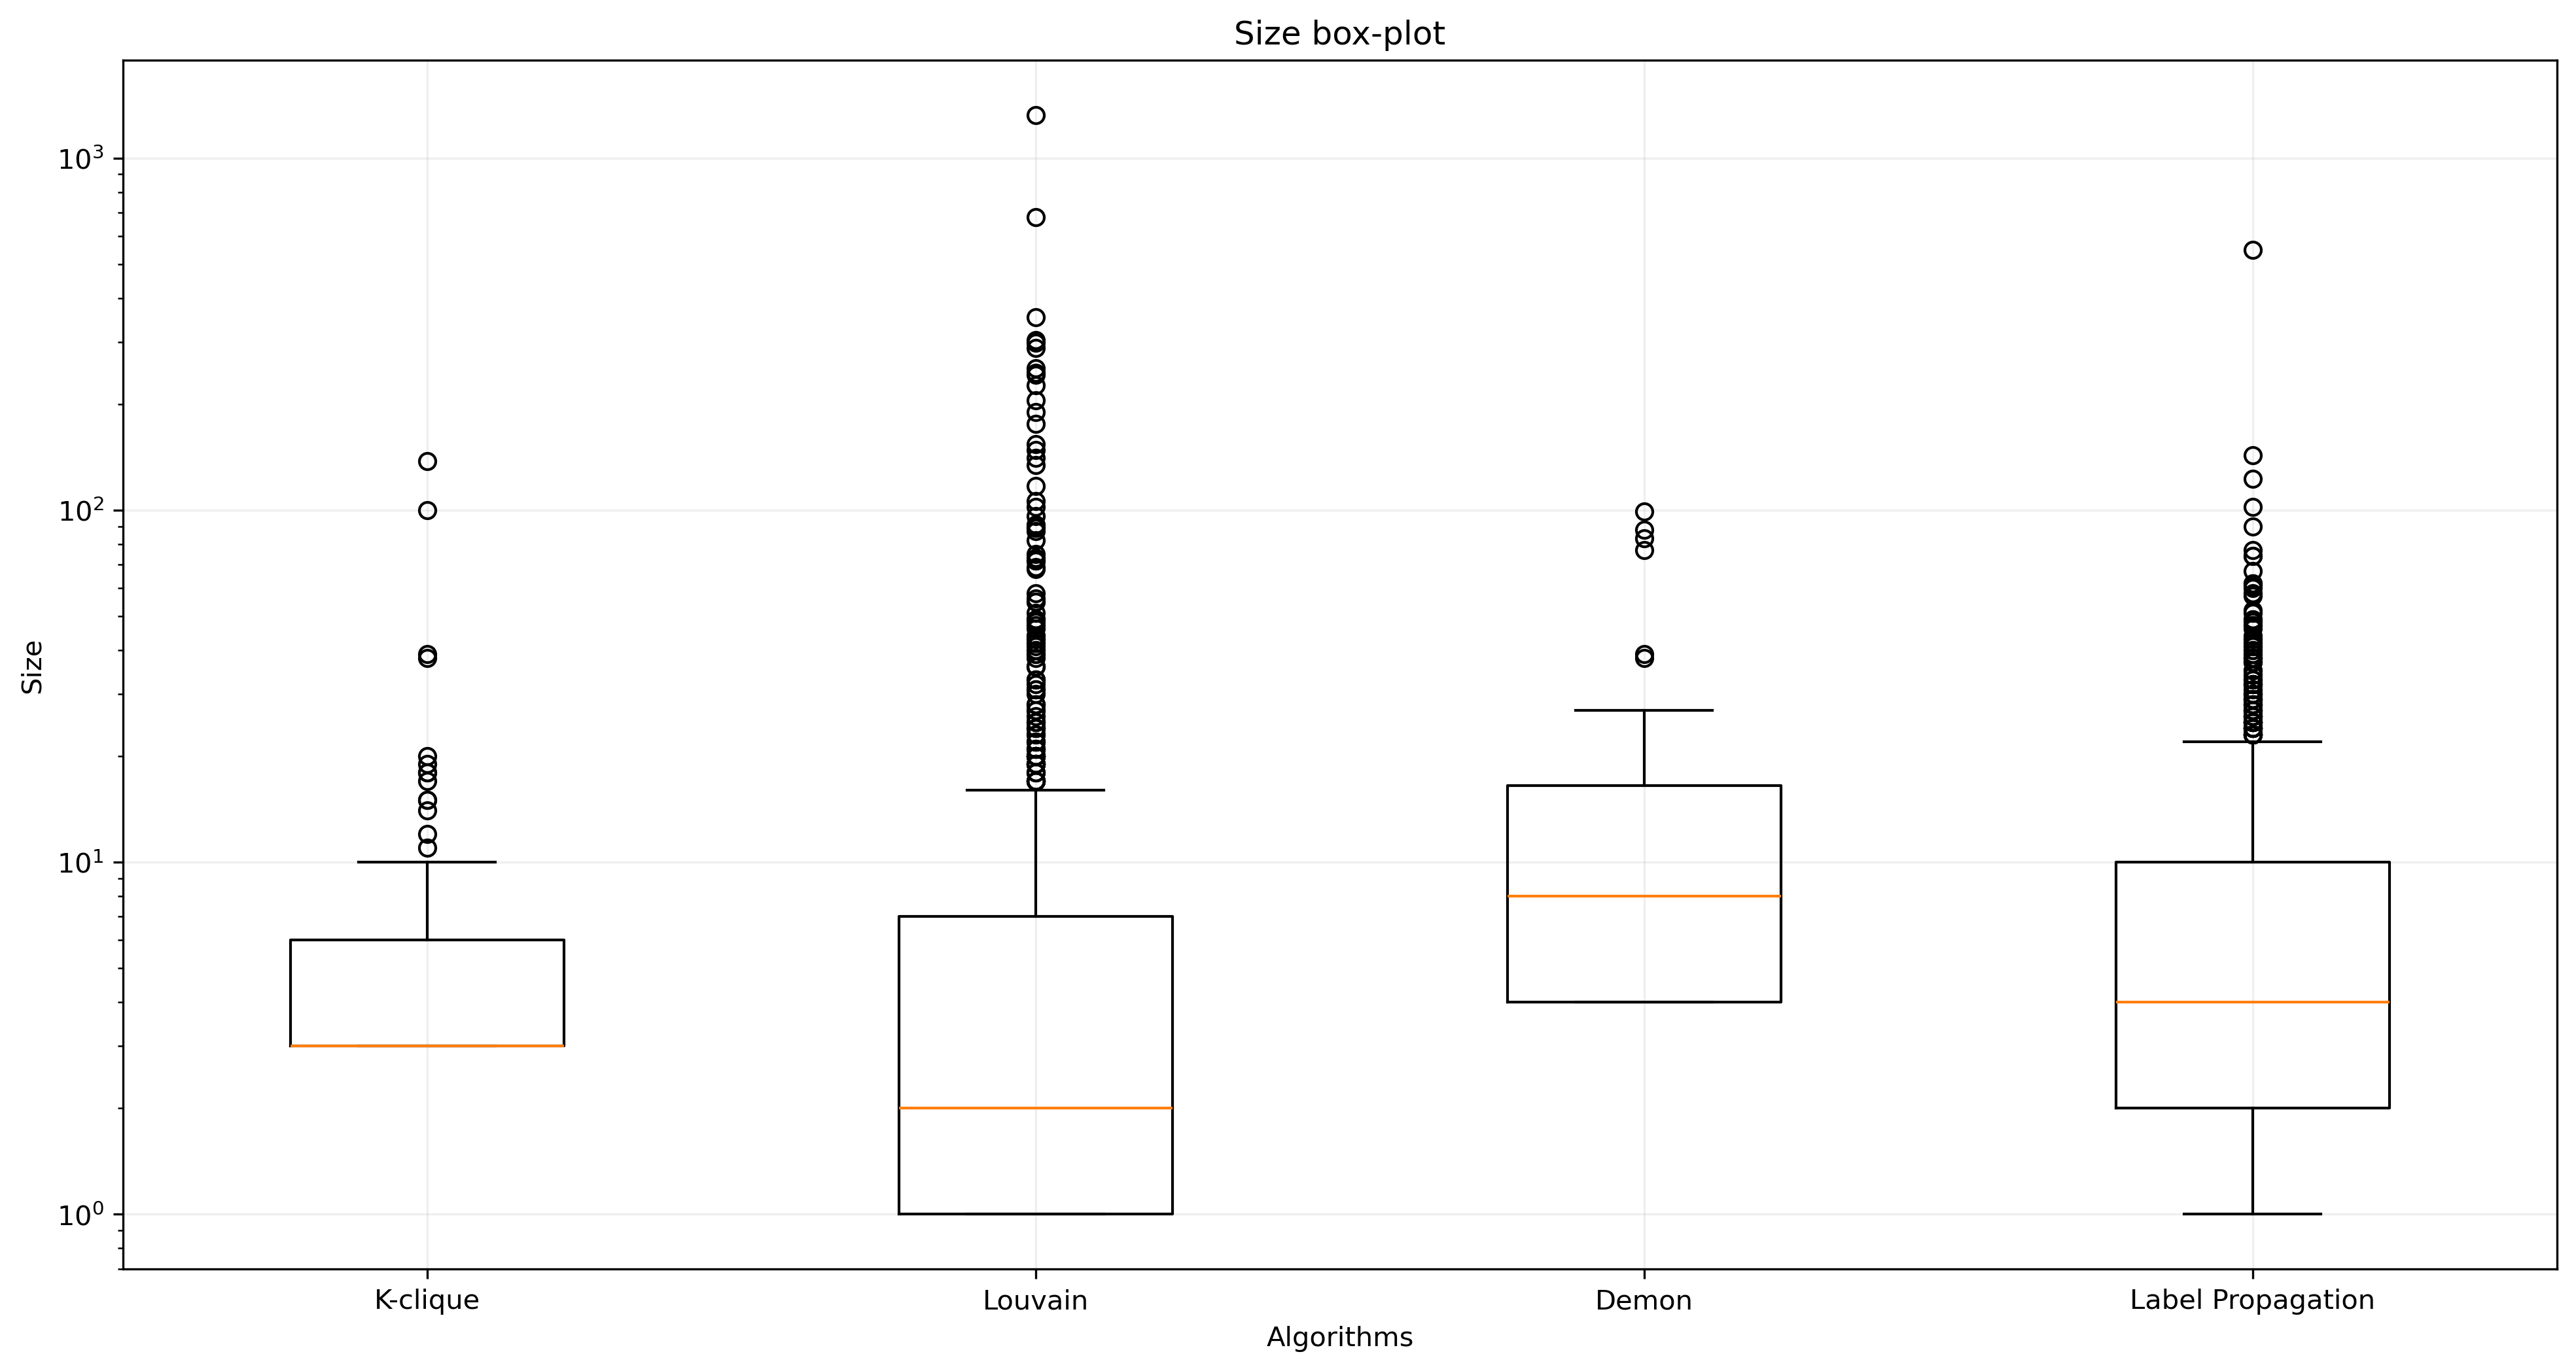

In [35]:
plot_boxplot(list_communities)

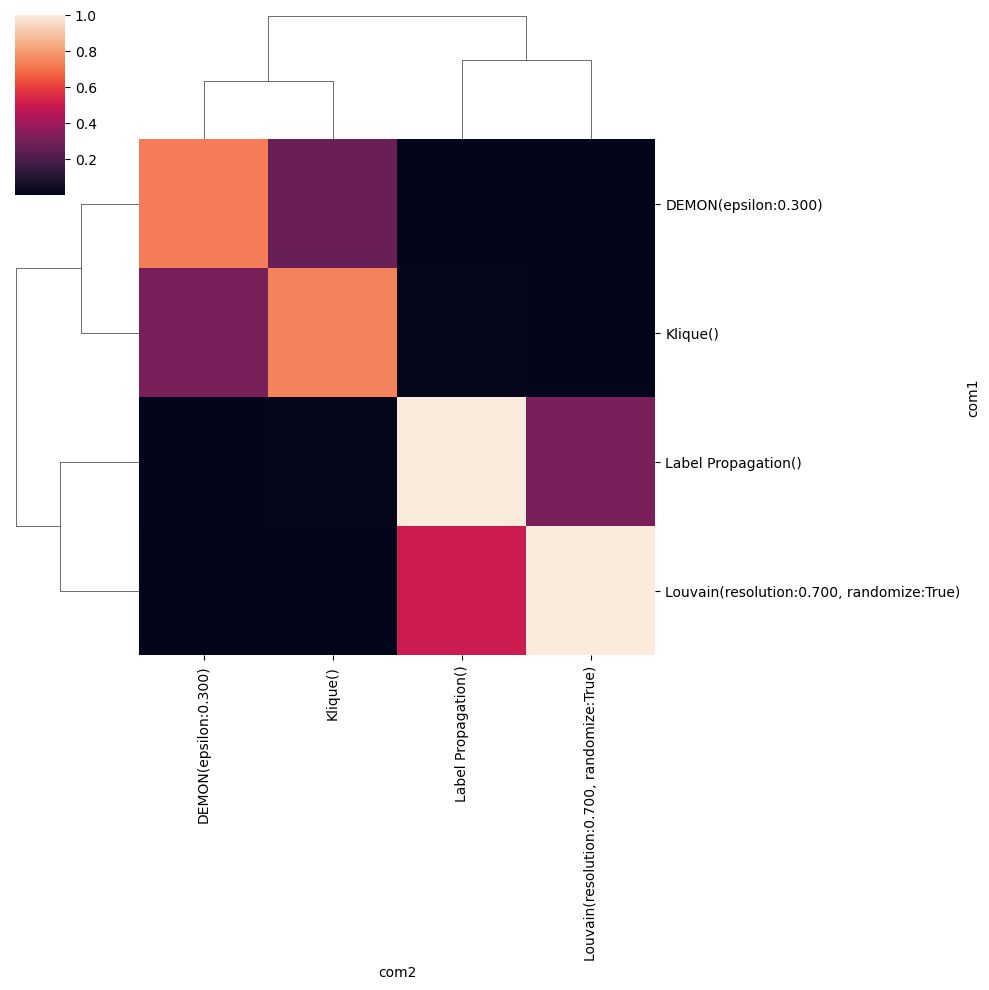

In [36]:
viz.plot_sim_matrix([k_clique_communities, louvain_communities, label_commmunities, demon_comunities],evaluation.nf1)

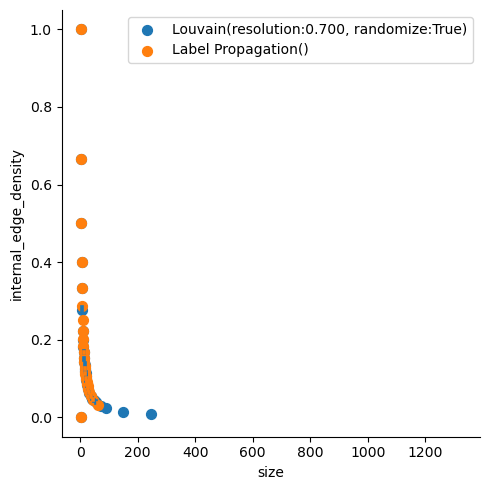

In [37]:
viz.plot_com_properties_relation([louvain_communities, label_commmunities], evaluation.size, evaluation.internal_edge_density)

<Axes: xlabel='Algorithm', ylabel='average_internal_degree'>

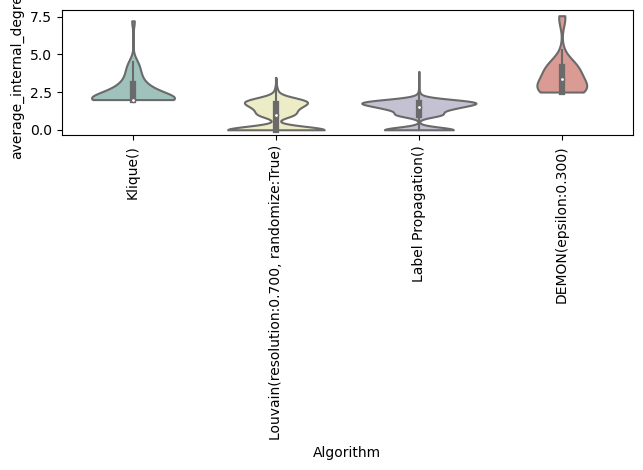

In [38]:
viz.plot_com_stat([k_clique_communities, louvain_communities, label_commmunities, demon_comunities],evaluation.average_internal_degree)

<Axes: xlabel='Algorithm', ylabel='internal_edge_density'>

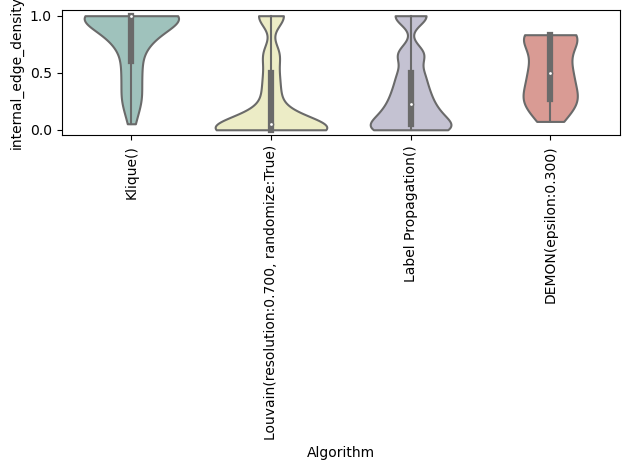

In [39]:
viz.plot_com_stat([k_clique_communities, louvain_communities, label_commmunities, demon_comunities],evaluation.internal_edge_density)

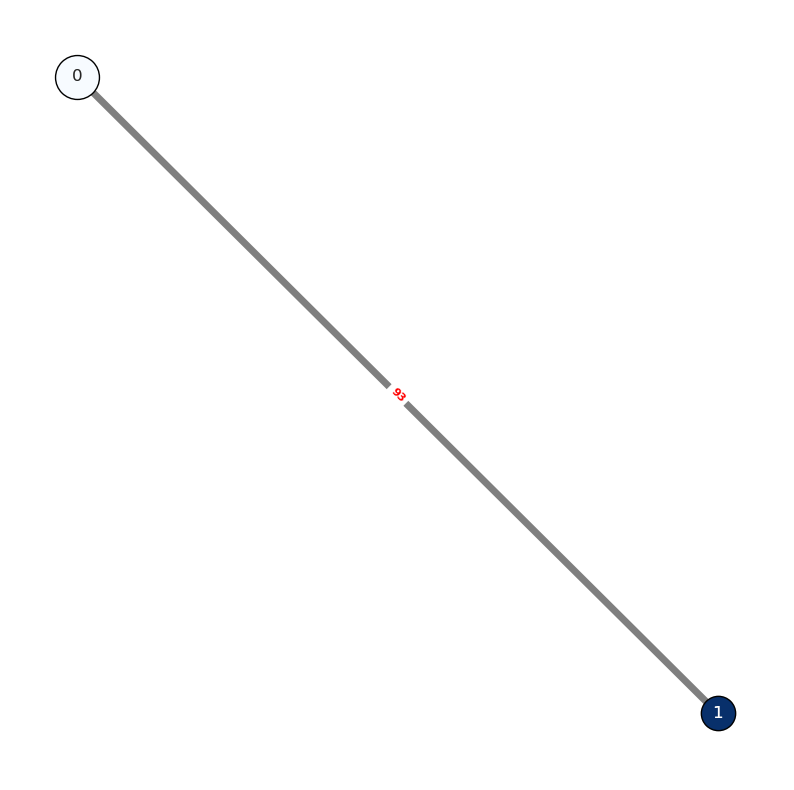

In [40]:
viz.plot_community_graph(G, louvain_communities, figsize=(10, 10), min_size = 500, cmap = 'Blues', plot_labels = True)

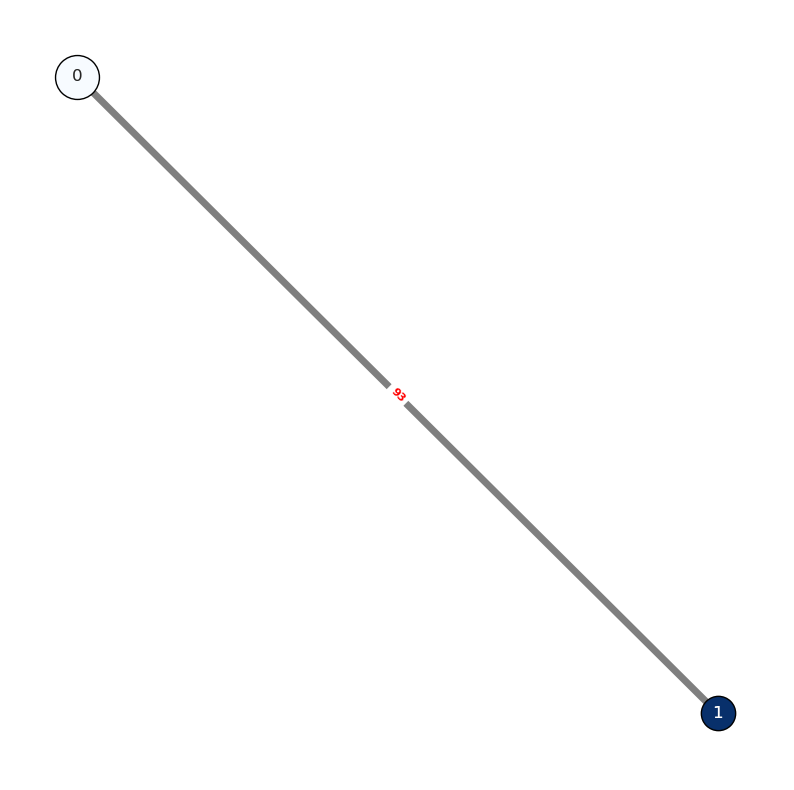

In [41]:
viz.plot_community_graph(G, louvain_communities, figsize=(10, 10), cmap = 'Blues', plot_labels = True, min_size = 500, top_k = 20)

### Attributes analaysis

In [42]:
len(G)

11085

In [43]:
#the function performs a purity analysis for a community method considering an attribute
#we consider as reference the majority attribute of the community vs the rest.

def community_purity(G, method, attr):
  purities = []
  num_nodes = len(set(sum(method.communities, [])))
  for c in method.communities:
    attr_list = []
    for node in c:
      attr_list.append(G.nodes[node][attr])

    cnt = Counter(attr_list)
    purity = max(cnt.values())/sum(cnt.values())
    purity_score = purity * (len(c)/num_nodes)
    purities.append((purity, len(c)))

  return purities


In [45]:
louvain_purities = community_purity(G, louvain_communities,'artist_first_genre')
louvain_purities = [x[0] for x in louvain_purities if x[1] > 3]

In [46]:
np.mean(louvain_purities), np.std(louvain_purities)

(0.5147201419382392, 0.21725761534910396)

In [48]:
genres_lists = [G.nodes[node].get('artist_first_genre', 'unknown') for node in G.nodes()]

In [54]:
genres = set(d.get('artist_first_genre', 'unknown') for _, d in G.nodes(data=True))

In [55]:
len(genres)

593

In [56]:
def main_genre_community(community, genres = genres):
  genres_lists = [G.nodes[node]['artist_first_genre'] for node in community]
  genres_lists = [x[:-1] if len(x) > 1 else x for x in genres_lists]

  genres_dist = {genre : 0 for genre in genres}
  countings = [(genre,len([0 for genre_list in genres_lists if genre in genre_list])) for genre in genres]
  countings = [(tup[0], tup[1] * 100 / len(genres_lists)) for tup in countings]

  return sorted(countings, key=lambda x: x[1], reverse = True)

In [57]:
main_genre_community(louvain_communities.communities[10])

[('disco', 1.951219512195122),
 ('jazz', 0.4878048780487805),
 ('rap', 0.4878048780487805),
 ('lo-fi', 0.4878048780487805),
 ('moroccan rap', 0.0),
 ('baroque pop', 0.0),
 ('duranguense', 0.0),
 ('swedish pop', 0.0),
 ('boogie', 0.0),
 ('post-disco', 0.0),
 ('slowcore', 0.0),
 ('j-rap', 0.0),
 ('speedcore', 0.0),
 ('latin country', 0.0),
 ('black metal', 0.0),
 ('slap house', 0.0),
 ('sufi', 0.0),
 ('new york drill', 0.0),
 ('country hip hop', 0.0),
 ('c-pop', 0.0),
 ('pagode baiano', 0.0),
 ('free jazz', 0.0),
 ('minimalism', 0.0),
 ('celtic rock', 0.0),
 ('soft pop', 0.0),
 ('pop punk', 0.0),
 ('forró', 0.0),
 ('emo rap', 0.0),
 ('pinoy indie', 0.0),
 ('space rock', 0.0),
 ('colombian pop', 0.0),
 ('punjabi hip hop', 0.0),
 ('adult standards', 0.0),
 ('bongo flava', 0.0),
 ('nu jazz', 0.0),
 ('red dirt', 0.0),
 ('egg punk', 0.0),
 ('japanese classical', 0.0),
 ('cumbia', 0.0),
 ('classic soul', 0.0),
 ('k-rap', 0.0),
 ('blues', 0.0),
 ('funk carioca', 0.0),
 ('electrocumbia', 0.0),
 

In [58]:
len([com for com in louvain_communities.communities if len(com) <= 2])

394

In [59]:
#for each community we see the top 5 genres w.r.t. the genre lists
genre_com_dict = { i : (main_genre_community(community)[:5],len(community)) for i, community in enumerate(louvain_communities.communities) if len(community) > 2}

In [60]:
#for each community, we count how many times in percentage a genre is included
#in the artist genre list related to each artists of a such communtiy

genre_com_dict

{0: ([('rap', 1.7371601208459215),
   ('trap', 1.4350453172205437),
   ('afrobeat', 0.9818731117824774),
   ('country', 0.6797583081570997),
   ('emo', 0.3776435045317221)],
  1324),
 1: ([('reggae', 21.61764705882353),
   ('latin', 12.794117647058824),
   ('trap', 6.029411764705882),
   ('rap', 6.029411764705882),
   ('reggaeton', 3.088235294117647)],
  680),
 2: ([('funk', 3.9660056657223794),
   ('sertanejo', 3.1161473087818696),
   ('forró', 1.4164305949008498),
   ('pagode', 1.13314447592068),
   ('latin', 0.56657223796034)],
  353),
 3: ([('desi', 2.960526315789474),
   ('moroccan rap', 0.0),
   ('baroque pop', 0.0),
   ('duranguense', 0.0),
   ('swedish pop', 0.0)],
  304),
 4: ([('funk', 16.722408026755854),
   ('trap', 4.013377926421405),
   ('rap', 4.013377926421405),
   ('pagode', 0.33444816053511706),
   ('sertanejo', 0.33444816053511706)],
  299),
 5: ([('afrobeat', 1.0380622837370241),
   ('latin', 1.0380622837370241),
   ('desi', 0.6920415224913494),
   ('trap', 0.346020